In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11

# Load data

In [29]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/alphai')
y_train = import_excel('Dataset/keff')

print('made dataset')
    
    

made dataset


In [30]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=5
print(vars[:,j])

scenario= "nuclear" #sinus, helix
n_instance = 1000
n_features = 5
n_var =int(vars[0,j])
latent_space =1000 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 1000 #1000, 500
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 2. 1.]


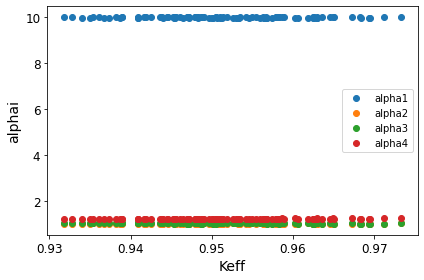

In [61]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    #X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(y_train,X_train[:,0], label = "alpha1")
    plt.scatter(y_train,X_train[:,1], label = "alpha2")
    plt.scatter(y_train,X_train[:,2], label = "alpha3")
    plt.scatter(y_train,X_train[:,3], label = "alpha4")
    plt.ylabel('alphai')
    plt.xlabel('Keff')
    plt.legend()
    plt.tight_layout()

# WGAN

### Architecture

In [41]:
generator=network_3D11.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_3D11.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 30)                30000     
_________________________________________________________________
batch_normalization_6 (Batch (None, 30)                120       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
_________________________________________________________________
batch_normalization_7 (Batch (None, 10)                40        
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_8 (Batch (None, 10)                40        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                

In [42]:
wgan = WGAN_Model11.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 5)                 30670     
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 2601      
Total params: 33,271
Trainable params: 33,171
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [43]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (99, 5)
Cycles:  1
X_train (99, 4)
y_train (99, 1)
X_train_scaled (99, 5)


## Training

In [46]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/1000
critic: 86.190781 - generator: 0.032623 - 2s
Epoch 2/1000
critic: 75.817787 - generator: 0.000598 - 0s
Epoch 3/1000
critic: 71.925003 - generator: 0.027064 - 0s
Epoch 4/1000
critic: 66.931625 - generator: 0.034257 - 0s
Epoch 5/1000
critic: 65.217148 - generator: 0.051422 - 0s
Epoch 6/1000
critic: 53.155731 - generator: -0.009553 - 0s
Epoch 7/1000
critic: 56.144543 - generator: 0.022530 - 0s
Epoch 8/1000
critic: 46.420750 - generator: 0.025466 - 0s
Epoch 9/1000
critic: 48.777931 - generator: 0.006719 - 0s
Epoch 10/1000
critic: 41.862431 - generator: 0.038771 - 0s
Epoch 11/1000
critic: 41.671734 - generator: 0.025821 - 0s
Epoch 12/1000
critic: 36.643188 - generator: 0.010613 - 0s
Epoch 13/1000
critic: 33.342743 - generator: 0.031409 - 0s
Epoch 14/1000
critic: 35.358589 - generator: 0.026059 - 0s
Epoch 15/1000
critic: 32.689442 - generator: 0.020797 - 0s
Epoch 16/1000
critic: 33.230911 - generator: 0.017938 - 0s
Epoch 17/1000
critic: 31.951834 - generator: 0.002721 - 0s
Epoch

critic: -0.020434 - generator: -0.140897 - 0s
Epoch 146/1000
critic: -0.017534 - generator: -0.139640 - 0s
Epoch 147/1000
critic: -0.009260 - generator: -0.143565 - 0s
Epoch 148/1000
critic: -0.019592 - generator: -0.133495 - 0s
Epoch 149/1000
critic: -0.009818 - generator: -0.138383 - 0s
Epoch 150/1000
critic: -0.006763 - generator: -0.137936 - 0s
Epoch 151/1000
critic: -0.034146 - generator: -0.141657 - 0s
Epoch 152/1000
critic: -0.009210 - generator: -0.146129 - 0s
Epoch 153/1000
critic: -0.012028 - generator: -0.130426 - 0s
Epoch 154/1000
critic: -0.009644 - generator: -0.158479 - 0s
Epoch 155/1000
critic: -0.009800 - generator: -0.154396 - 0s
Epoch 156/1000
critic: -0.025858 - generator: -0.145986 - 0s
Epoch 157/1000
critic: -0.020691 - generator: -0.145750 - 0s
Epoch 158/1000
critic: -0.005795 - generator: -0.148355 - 0s
Epoch 159/1000
critic: -0.017185 - generator: -0.151113 - 0s
Epoch 160/1000
critic: -0.021003 - generator: -0.146156 - 0s
Epoch 161/1000
critic: 0.005415 - gener

critic: -0.018912 - generator: -0.186384 - 0s
Epoch 285/1000
critic: 0.009040 - generator: -0.183496 - 0s
Epoch 286/1000
critic: -0.030032 - generator: -0.192097 - 0s
Epoch 287/1000
critic: -0.010543 - generator: -0.190159 - 0s
Epoch 288/1000
critic: -0.015202 - generator: -0.189828 - 0s
Epoch 289/1000
critic: -0.020780 - generator: -0.189165 - 0s
Epoch 290/1000
critic: -0.032129 - generator: -0.191532 - 0s
Epoch 291/1000
critic: -0.010506 - generator: -0.184516 - 0s
Epoch 292/1000
critic: 0.009711 - generator: -0.185465 - 0s
Epoch 293/1000
critic: -0.027963 - generator: -0.176093 - 0s
Epoch 294/1000
critic: -0.008221 - generator: -0.203814 - 0s
Epoch 295/1000
critic: -0.001492 - generator: -0.175204 - 0s
Epoch 296/1000
critic: -0.024239 - generator: -0.182899 - 0s
Epoch 297/1000
critic: -0.019283 - generator: -0.200892 - 0s
Epoch 298/1000
critic: -0.015061 - generator: -0.189788 - 0s
Epoch 299/1000
critic: -0.018584 - generator: -0.203768 - 0s
Epoch 300/1000
critic: -0.015679 - genera

critic: -0.020148 - generator: -0.191684 - 0s
Epoch 423/1000
critic: -0.013938 - generator: -0.201478 - 0s
Epoch 424/1000
critic: -0.020629 - generator: -0.189025 - 0s
Epoch 425/1000
critic: -0.018811 - generator: -0.189799 - 0s
Epoch 426/1000
critic: -0.024530 - generator: -0.204842 - 0s
Epoch 427/1000
critic: -0.020822 - generator: -0.210814 - 0s
Epoch 428/1000
critic: -0.001171 - generator: -0.192148 - 0s
Epoch 429/1000
critic: -0.018306 - generator: -0.196610 - 0s
Epoch 430/1000
critic: -0.007380 - generator: -0.187939 - 0s
Epoch 431/1000
critic: -0.016161 - generator: -0.189842 - 0s
Epoch 432/1000
critic: -0.001344 - generator: -0.199661 - 0s
Epoch 433/1000
critic: -0.013529 - generator: -0.192606 - 0s
Epoch 434/1000
critic: -0.019483 - generator: -0.199942 - 0s
Epoch 435/1000
critic: -0.011471 - generator: -0.193455 - 0s
Epoch 436/1000
critic: -0.012536 - generator: -0.203048 - 0s
Epoch 437/1000
critic: -0.011284 - generator: -0.175885 - 0s
Epoch 438/1000
critic: -0.010633 - gene

critic: -0.008795 - generator: -0.198689 - 0s
Epoch 560/1000
critic: 0.000548 - generator: -0.174311 - 0s
Epoch 561/1000
critic: -0.012667 - generator: -0.191402 - 0s
Epoch 562/1000
critic: 0.026232 - generator: -0.176819 - 0s
Epoch 563/1000
critic: -0.015673 - generator: -0.200379 - 0s
Epoch 564/1000
critic: 0.034735 - generator: -0.195563 - 0s
Epoch 565/1000
critic: -0.022888 - generator: -0.185399 - 0s
Epoch 566/1000
critic: -0.016627 - generator: -0.203490 - 0s
Epoch 567/1000
critic: -0.022910 - generator: -0.196515 - 0s
Epoch 568/1000
critic: -0.012474 - generator: -0.195109 - 0s
Epoch 569/1000
critic: 0.007619 - generator: -0.187975 - 0s
Epoch 570/1000
critic: -0.017907 - generator: -0.191046 - 0s
Epoch 571/1000
critic: -0.020609 - generator: -0.195409 - 0s
Epoch 572/1000
critic: 0.002658 - generator: -0.185396 - 0s
Epoch 573/1000
critic: 0.020959 - generator: -0.186305 - 0s
Epoch 574/1000
critic: -0.006883 - generator: -0.189496 - 0s
Epoch 575/1000
critic: -0.020179 - generator:

critic: -0.010653 - generator: -0.197563 - 0s
Epoch 701/1000
critic: -0.014257 - generator: -0.185423 - 0s
Epoch 702/1000
critic: -0.002365 - generator: -0.185210 - 0s
Epoch 703/1000
critic: -0.009024 - generator: -0.190687 - 0s
Epoch 704/1000
critic: -0.010046 - generator: -0.192505 - 0s
Epoch 705/1000
critic: -0.015376 - generator: -0.186887 - 0s
Epoch 706/1000
critic: 0.002722 - generator: -0.192084 - 0s
Epoch 707/1000
critic: -0.012105 - generator: -0.191530 - 0s
Epoch 708/1000
critic: -0.004676 - generator: -0.186895 - 0s
Epoch 709/1000
critic: -0.018944 - generator: -0.179869 - 0s
Epoch 710/1000
critic: -0.000290 - generator: -0.189034 - 0s
Epoch 711/1000
critic: -0.013238 - generator: -0.182850 - 0s
Epoch 712/1000
critic: -0.019863 - generator: -0.181033 - 0s
Epoch 713/1000
critic: -0.005202 - generator: -0.200775 - 0s
Epoch 714/1000
critic: -0.002691 - generator: -0.178558 - 0s
Epoch 715/1000
critic: 0.005702 - generator: -0.174356 - 0s
Epoch 716/1000
critic: -0.006565 - genera

critic: 0.005615 - generator: -0.183039 - 0s
Epoch 841/1000
critic: -0.018028 - generator: -0.177894 - 0s
Epoch 842/1000
critic: -0.006782 - generator: -0.177022 - 0s
Epoch 843/1000
critic: 0.013466 - generator: -0.193003 - 0s
Epoch 844/1000
critic: -0.001697 - generator: -0.192122 - 0s
Epoch 845/1000
critic: 0.004075 - generator: -0.185992 - 0s
Epoch 846/1000
critic: -0.005766 - generator: -0.181260 - 0s
Epoch 847/1000
critic: 0.003460 - generator: -0.183741 - 0s
Epoch 848/1000
critic: 0.013949 - generator: -0.186848 - 0s
Epoch 849/1000
critic: -0.005573 - generator: -0.184547 - 0s
Epoch 850/1000
critic: 0.009853 - generator: -0.191667 - 0s
Epoch 851/1000
critic: -0.001166 - generator: -0.176509 - 0s
Epoch 852/1000
critic: -0.000567 - generator: -0.188770 - 0s
Epoch 853/1000
critic: 0.000553 - generator: -0.183918 - 0s
Epoch 854/1000
critic: -0.003363 - generator: -0.178717 - 0s
Epoch 855/1000
critic: -0.000434 - generator: -0.181530 - 0s
Epoch 856/1000
critic: -0.005143 - generator: 

critic: -0.006126 - generator: -0.183488 - 0s
Epoch 980/1000
critic: 0.011345 - generator: -0.179247 - 0s
Epoch 981/1000
critic: -0.000659 - generator: -0.190938 - 0s
Epoch 982/1000
critic: 0.000102 - generator: -0.179249 - 0s
Epoch 983/1000
critic: 0.003750 - generator: -0.176075 - 0s
Epoch 984/1000
critic: 0.016378 - generator: -0.182860 - 0s
Epoch 985/1000
critic: -0.002688 - generator: -0.176040 - 0s
Epoch 986/1000
critic: 0.000311 - generator: -0.175665 - 0s
Epoch 987/1000
critic: 0.012037 - generator: -0.173825 - 0s
Epoch 988/1000
critic: 0.005743 - generator: -0.185855 - 0s
Epoch 989/1000
critic: 0.022639 - generator: -0.186532 - 0s
Epoch 990/1000
critic: -0.005190 - generator: -0.182286 - 0s
Epoch 991/1000
critic: -0.013714 - generator: -0.175200 - 0s
Epoch 992/1000
critic: -0.004948 - generator: -0.184464 - 0s
Epoch 993/1000
critic: 0.002157 - generator: -0.177339 - 0s
Epoch 994/1000
critic: -0.011163 - generator: -0.172056 - 0s
Epoch 995/1000
critic: 0.000707 - generator: -0.

#### plot loss

Loss: 


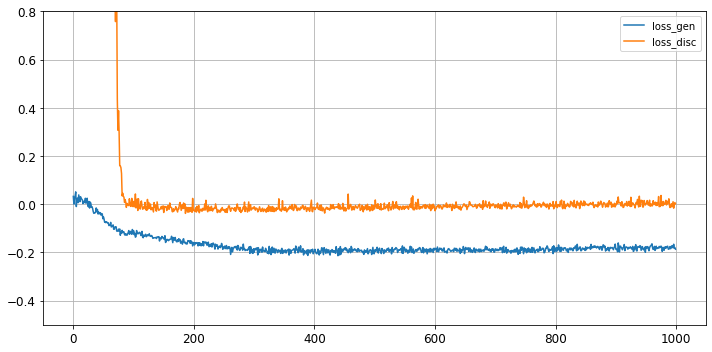

In [47]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-0.5,0.8])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [48]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_5/assets


### Sampleing from the latent space

Predicted Values: (100, 5)


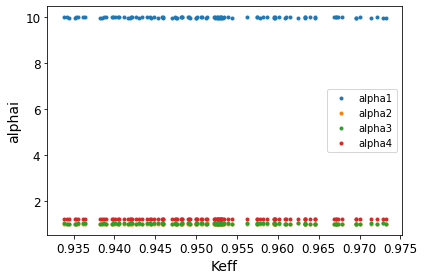

In [64]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([100, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    #plt.scatter(y_train,X_train[:,0],marker='x', label = "sampel_alpha1")
    #plt.scatter(y_train,X_train[:,1],marker='x', label = "sampel_alpha2")
    #plt.scatter(y_train,X_train[:,2],marker='x', label = "sampel_alpha3")
    #plt.scatter(y_train,X_train[:,3],marker='x', label = "sampel_alpha4")
    
    plt.scatter(predicted_values[:,4],predicted_values[:,0],marker='.', label = "alpha1")
    plt.scatter(predicted_values[:,4],predicted_values[:,1],marker='.', label = "alpha2")
    plt.scatter(predicted_values[:,4],predicted_values[:,2],marker='.', label = "alpha3")
    plt.scatter(predicted_values[:,4],predicted_values[:,3],marker='.', label = "alpha4")
    
    
    
    plt.ylabel('alphai')
    plt.xlabel('Keff')
    plt.legend()
    plt.tight_layout()
    
    

### Applying the prediction function

## Fixed Input